### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

In [1]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dataset = pd.read_csv('student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Tampilkan informasi dasar dataset
print(dataset.info())
print("\nStatistik deskriptif:")
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None

Statistik deskriptif:
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


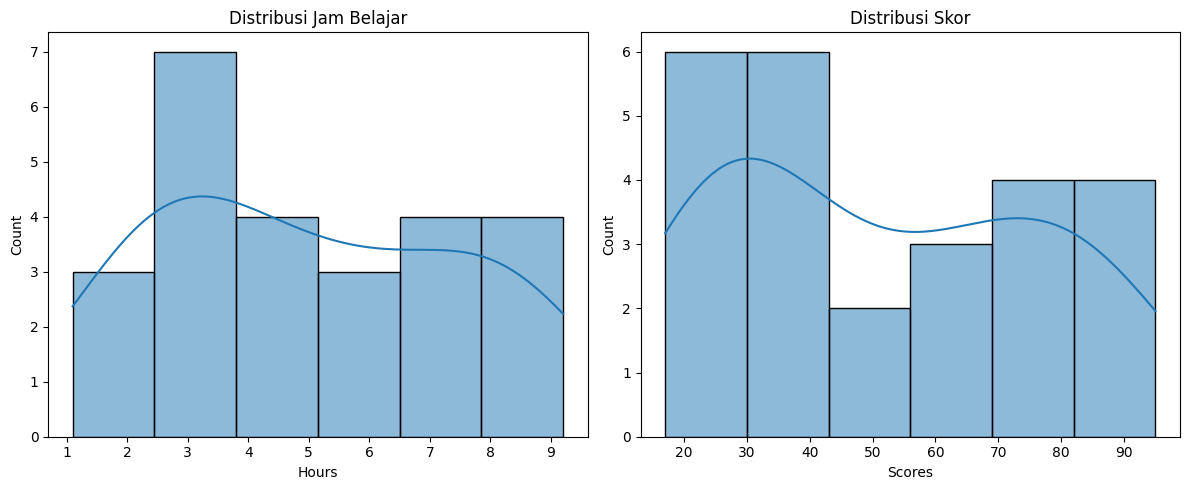

In [4]:
# Visualisasi distribusi data
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.histplot(dataset['Hours'], kde=True)
plt.title('Distribusi Jam Belajar')
plt.subplot(122)
sns.histplot(dataset['Scores'], kde=True)
plt.title('Distribusi Skor')
plt.tight_layout()
plt.show()

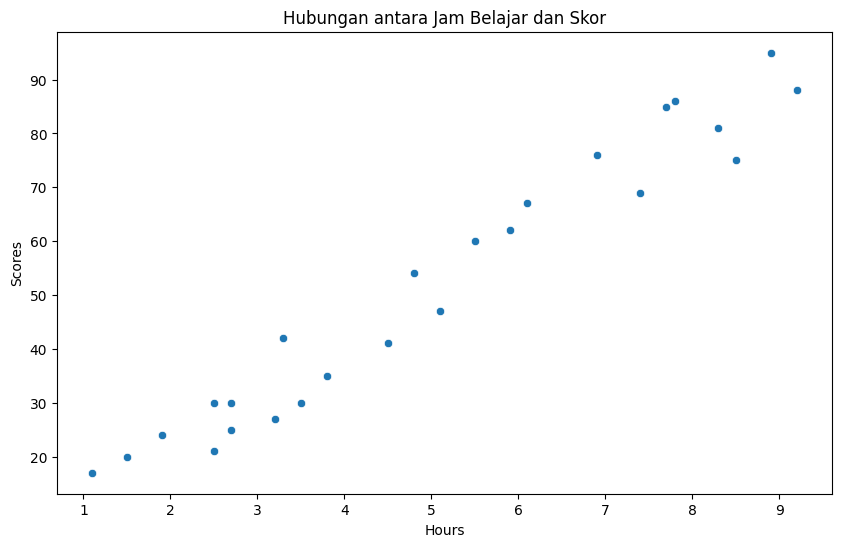


Korelasi antara Hours dan Scores:
0.9761906560220887


In [5]:
# Visualisasi hubungan antara Hours dan Scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours', y='Scores', data=dataset)
plt.title('Hubungan antara Jam Belajar dan Skor')
plt.show()

# Hitung korelasi
print("\nKorelasi antara Hours dan Scores:")
print(dataset['Hours'].corr(dataset['Scores']))

Jumlah data duplikat: 0

Jumlah nilai yang hilang:
Hours     0
Scores    0
dtype: int64

Batas bawah:
Hours     -4.35
Scores   -37.50
dtype: float64

Batas atas:
Hours      14.45
Scores    142.50
dtype: float64

Jumlah outlier:
Hours     0
Scores    0
dtype: int64


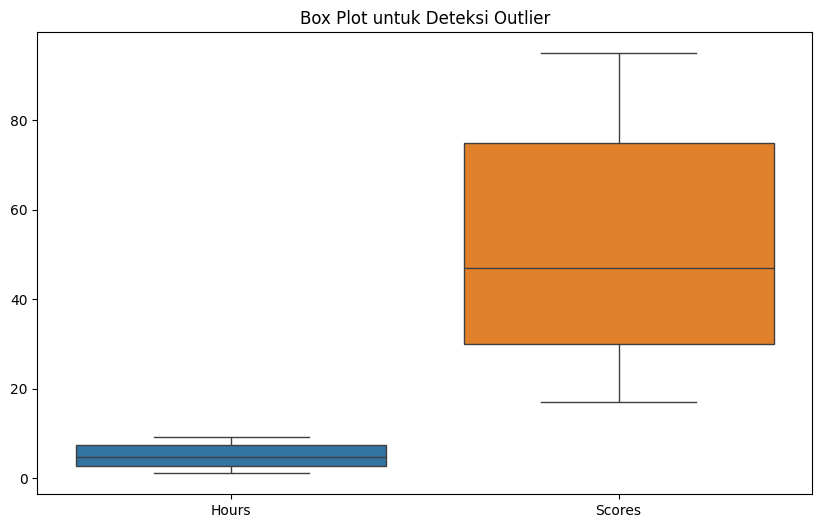

In [6]:
# Check Duplicated Data
print("Jumlah data duplikat:", dataset.duplicated().sum())

# Check Missing Value
print("\nJumlah nilai yang hilang:")
print(dataset.isnull().sum())

# Outlier Analysis menggunakan IQR
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nBatas bawah:")
print(lower_bound)
print("\nBatas atas:")
print(upper_bound)

outliers = ((dataset < lower_bound) | (dataset > upper_bound)).sum()
print("\nJumlah outlier:")
print(outliers)

# Visualisasi outlier dengan box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset)
plt.title('Box Plot untuk Deteksi Outlier')
plt.show()

In [7]:
# Pisahkan fitur dan target
X = dataset[['Hours']]
y = dataset['Scores']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Model 2: Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Model 3: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


Evaluasi Model Linear Regression:
MSE: 18.9432
RMSE: 4.3524
R2 Score: 0.9678

Evaluasi Model Decision Tree:
MSE: 31.7000
RMSE: 5.6303
R2 Score: 0.9461

Evaluasi Model Random Forest:
MSE: 13.0452
RMSE: 3.6118
R2 Score: 0.9778


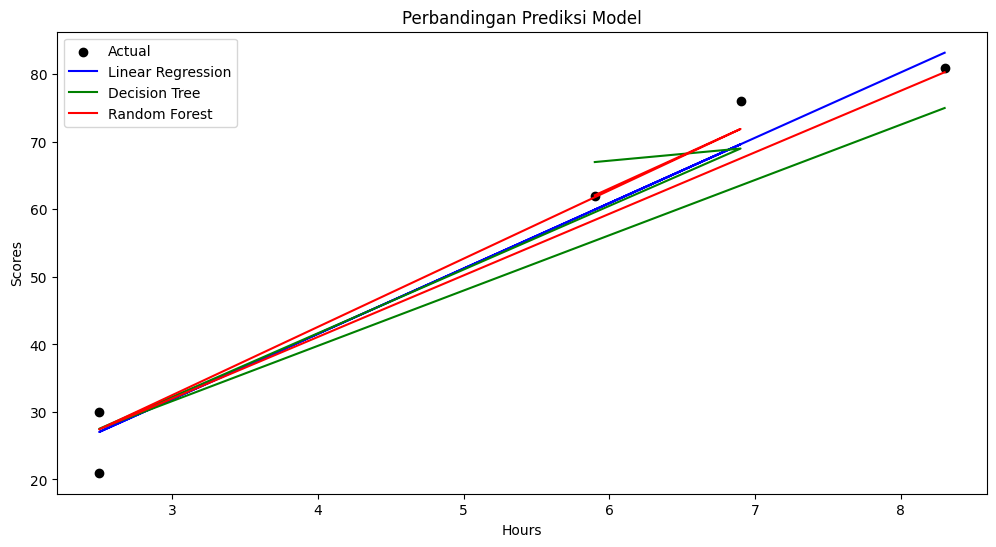

In [8]:
# Fungsi untuk menghitung metrik evaluasi
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\nEvaluasi Model {model_name}:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")

# Evaluasi setiap model
evaluate_model(y_test, lr_pred, "Linear Regression")
evaluate_model(y_test, dt_pred, "Decision Tree")
evaluate_model(y_test, rf_pred, "Random Forest")

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, lr_pred, color='blue', label='Linear Regression')
plt.plot(X_test, dt_pred, color='green', label='Decision Tree')
plt.plot(X_test, rf_pred, color='red', label='Random Forest')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Perbandingan Prediksi Model')
plt.legend()
plt.show()


Model dengan performa terbaik berdasarkan R2 Score: Random Forest


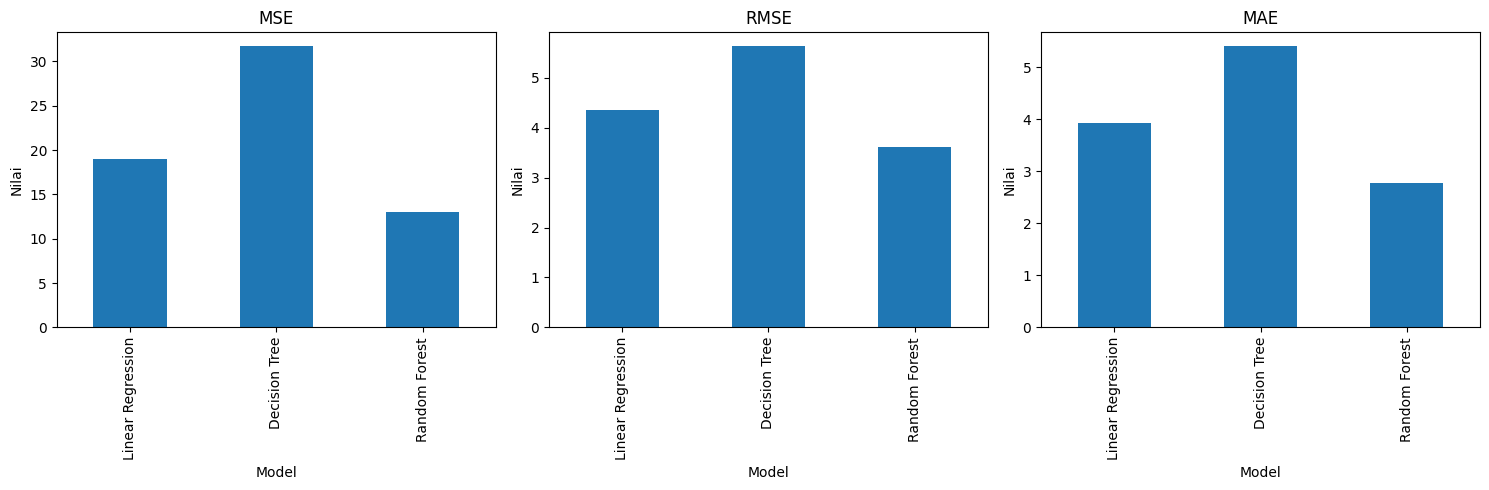

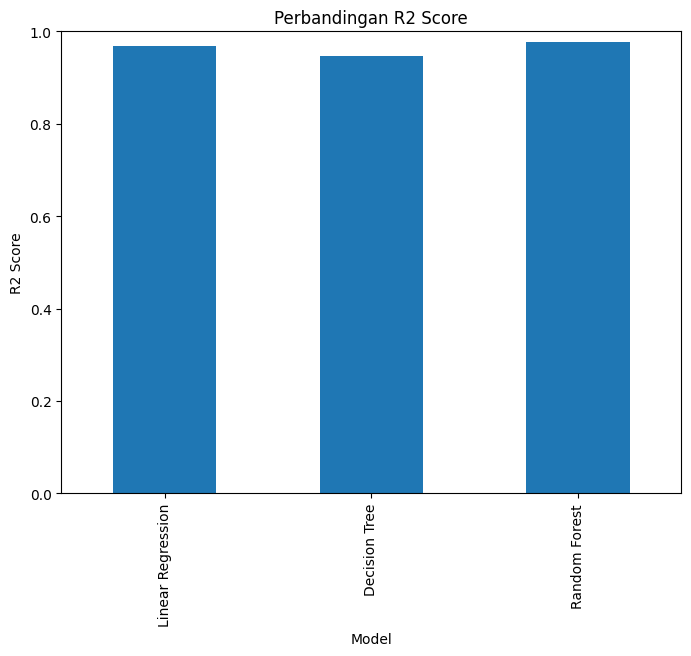


Analisis Kompleksitas dan Interpretabilitas Model:
1. Linear Regression:
   - Kompleksitas: Rendah
   - Interpretabilitas: Tinggi
   - Kelebihan: Mudah dipahami, cepat dilatih
   - Kekurangan: Mungkin tidak menangkap hubungan non-linear

2. Decision Tree:
   - Kompleksitas: Sedang
   - Interpretabilitas: Sedang
   - Kelebihan: Dapat menangkap hubungan non-linear, mudah divisualisasikan
   - Kekurangan: Cenderung overfitting jika tidak dibatasi

3. Random Forest:
   - Kompleksitas: Tinggi
   - Interpretabilitas: Rendah
   - Kelebihan: Biasanya memberikan performa yang baik, tahan terhadap overfitting
   - Kekurangan: Sulit diinterpretasikan, membutuhkan lebih banyak sumber daya komputasi

Kesimpulan:
Berdasarkan R2 Score, model Random Forest memiliki performa terbaik.
Namun, pemilihan model akhir harus mempertimbangkan trade-off antara performa, kompleksitas, dan interpretabilitas sesuai dengan kebutuhan spesifik proyek.


In [11]:
# Import library tambahan
from sklearn.metrics import mean_absolute_error

# Fungsi untuk menghitung metrik evaluasi
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    }

# Tentukan model terbaik berdasarkan R2 Score
best_model = results_df['R2 Score'].idxmax()
print(f"\nModel dengan performa terbaik berdasarkan R2 Score: {best_model}")

# Visualisasi perbandingan metrik evaluasi
metrics = ['MSE', 'RMSE', 'MAE']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, metric in enumerate(metrics):
    results_df[metric].plot(kind='bar', ax=axes[i], title=metric)
    axes[i].set_ylabel('Nilai')
plt.tight_layout()
plt.show()

# Visualisasi R2 Score
plt.figure(figsize=(8, 6))
results_df['R2 Score'].plot(kind='bar')
plt.title('Perbandingan R2 Score')
plt.ylabel('R2 Score')
plt.ylim(0, 1)
plt.show()

# Analisis kompleksitas dan interpretabilitas model
print("\nAnalisis Kompleksitas dan Interpretabilitas Model:")
print("1. Linear Regression:")
print("   - Kompleksitas: Rendah")
print("   - Interpretabilitas: Tinggi")
print("   - Kelebihan: Mudah dipahami, cepat dilatih")
print("   - Kekurangan: Mungkin tidak menangkap hubungan non-linear")

print("\n2. Decision Tree:")
print("   - Kompleksitas: Sedang")
print("   - Interpretabilitas: Sedang")
print("   - Kelebihan: Dapat menangkap hubungan non-linear, mudah divisualisasikan")
print("   - Kekurangan: Cenderung overfitting jika tidak dibatasi")

print("\n3. Random Forest:")
print("   - Kompleksitas: Tinggi")
print("   - Interpretabilitas: Rendah")
print("   - Kelebihan: Biasanya memberikan performa yang baik, tahan terhadap overfitting")
print("   - Kekurangan: Sulit diinterpretasikan, membutuhkan lebih banyak sumber daya komputasi")

print("\nKesimpulan:")
print(f"Berdasarkan R2 Score, model {best_model} memiliki performa terbaik.")
print("Namun, pemilihan model akhir harus mempertimbangkan trade-off antara performa, kompleksitas, dan interpretabilitas sesuai dengan kebutuhan spesifik proyek.")